# Galerkin and Supercell methods for the Ten Martini problem

In [16]:
from specpol.ritz import ritz_tridiag, supercell
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from fractions import Fraction

In [17]:
# the almost Mathieu operator is y-periodic for alpha = x/y
def get_denom(alpha):
    """Get the denominator of a number `alpha`."""
    return Fraction(alpha).limit_denominator()

In [18]:
lda = 1
theta = 1
def diag(alpha):
    return lambda n: 2 * lda * np.cos(2*np.pi*(theta + n*alpha))

In [73]:
# regular Ritz method
spec = {}
for a in tqdm(np.linspace(-1, 1, 201)):
    spec[a] = ritz_tridiag(1, diag(a), 1, 750)

100%|██████████| 201/201 [05:25<00:00,  1.62s/it]


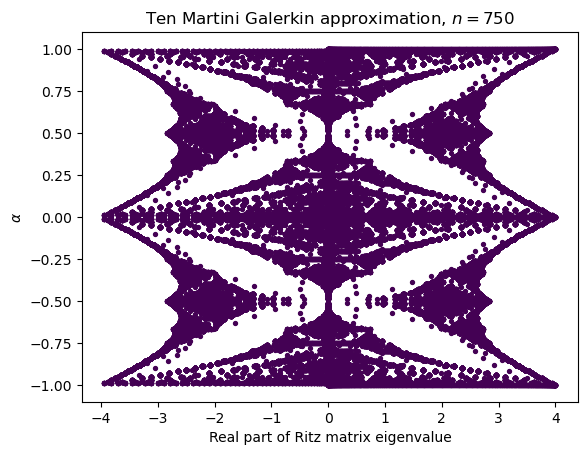

In [74]:
for alpha, vals in spec.items():
    plt.scatter(vals.real, [alpha]*len(vals), c = "#440154" ,s = 8)
plt.title("Ten Martini Galerkin approximation, $n = 750$")
plt.xlabel("Real part of Ritz matrix eigenvalue")
plt.ylabel(r"$\alpha$")
plt.show()

In [62]:
cell_spec = {}
for a in tqdm(np.linspace(-1, 1, 201)):
    cell_spec[a] = supercell(1, diag(a), 1, 100, alpha_samples=10)

100%|██████████| 201/201 [00:40<00:00,  4.99it/s]


/tmp/ipykernel_10976/2345125119.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


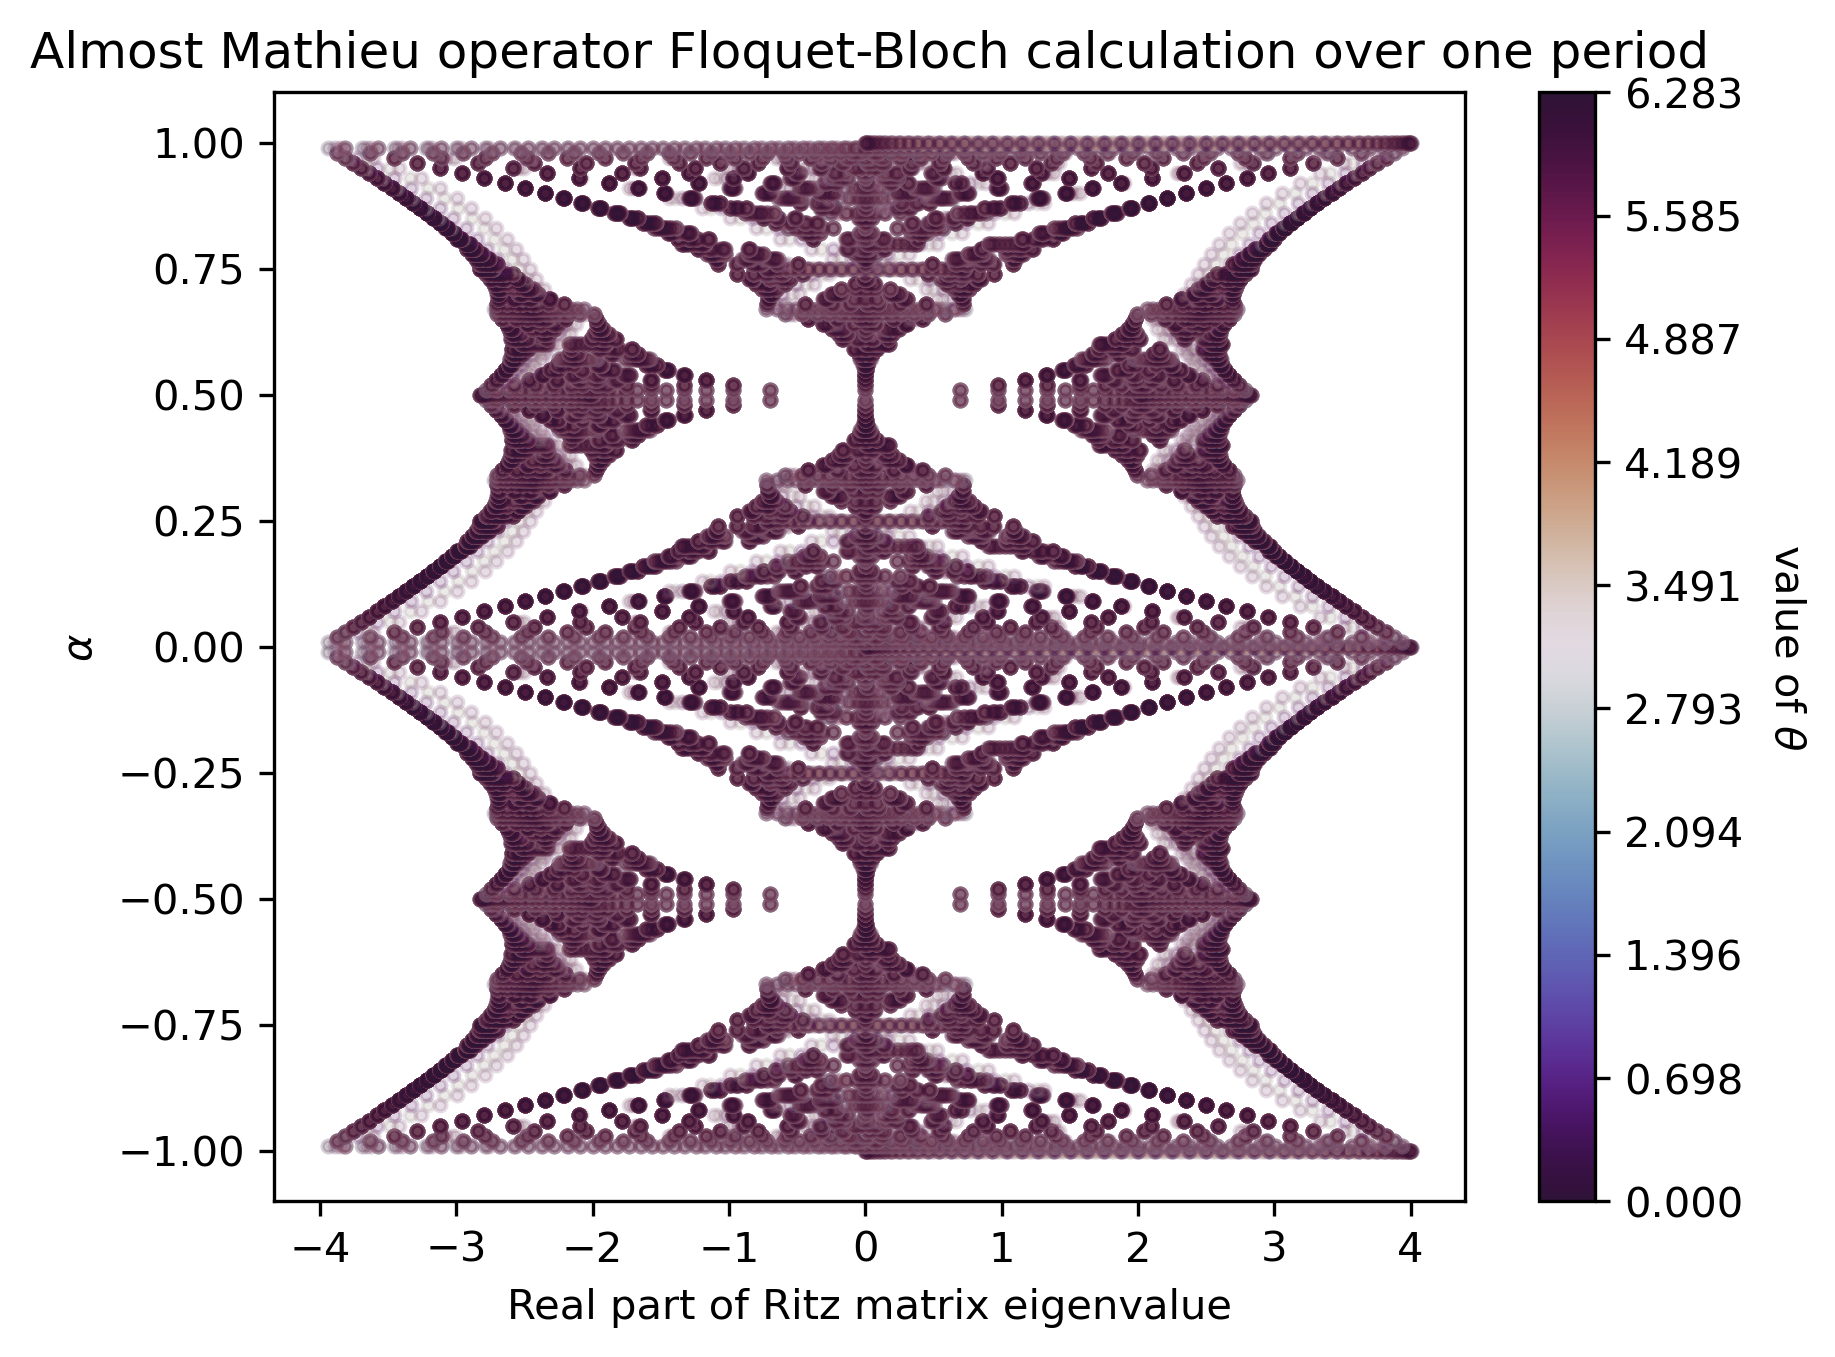

In [77]:
from matplotlib import colormaps
fig = plt.figure(dpi=300)
ax1 = fig.add_subplot()
for a in cell_spec.keys():
    viridis = colormaps["twilight_shifted"].resampled(len(cell_spec[a]))
    ax1.set_prop_cycle(color=viridis.colors)
    for theta_vals in cell_spec[a].values():
        ax1.scatter(theta_vals.real, [a]*len(theta_vals), s = 8, alpha=0.1)
ax1.set_title("Almost Mathieu operator Floquet-Bloch calculation over one period")
ax1.set_xlabel("Real part of Ritz matrix eigenvalue")
ax1.set_ylabel(r"$\alpha$")
norm = plt.Normalize(0, 2*np.pi)
cmap = plt.get_cmap("twilight_shifted")
sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
cb = fig.colorbar(sm, ax=ax1, ticks=list(np.linspace(0, 2*np.pi, 10)))
cb.set_label(
    r"value of $\theta$",
    rotation=270,
    labelpad=15,
)

fig.show()

In [49]:
from functools import reduce
def engel(seq):
    """Compute a fraction from its Engel expansion."""
    if len(seq) == 1:
        return seq[0]
    else:
        return 1/reduce(lambda x, y: x*y, seq) + engel(seq[:-1])

def pi(n):
    return engel([1, 1, 1, 8, 8, 17, 19, 300, 1991, 2492, 7236, 10586, 34588, 63403, 70637, 1236467, 5417668, 5515697, 5633167, 7458122][:n])
pi(5)
get_denom(pi(5))

Fraction(201, 64)

In [50]:
cell_spec_pi = {}
for a in tqdm(np.linspace(3.1, 3.15, 51)):
    cell_spec_pi[a] = supercell(1, diag(a), 1, get_denom(a), alpha_samples=10)

  0%|          | 0/51 [00:00<?, ?it/s]/home/alexhroom/.local/lib/python3.11/site-packages/specpol/ritz/discrete.py:75: ComplexWarning: Casting complex values to real discards the imaginary part
  supercell_matrix[-1][0] = 1 / alpha
/home/alexhroom/.local/lib/python3.11/site-packages/specpol/ritz/discrete.py:76: ComplexWarning: Casting complex values to real discards the imaginary part
  supercell_matrix[0][-1] = subdiag(matrix_size // 2) * alpha
100%|██████████| 51/51 [00:00<00:00, 1487.90it/s]


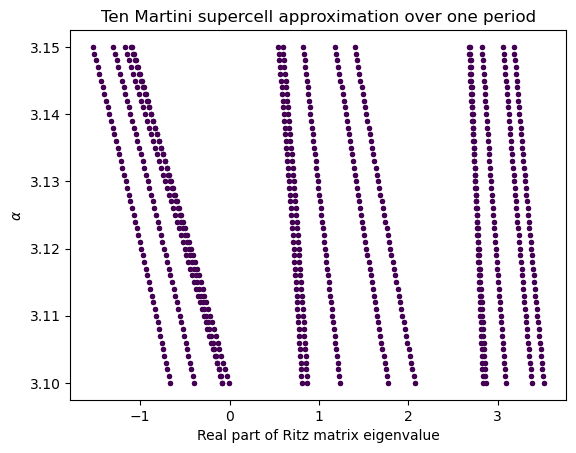

In [51]:
for alpha, vals in cell_spec_pi.items():
    for theta_vals in vals.values():
        plt.scatter(theta_vals.real, [alpha]*len(theta_vals), c = "#440154" ,s = 8)
plt.title("Ten Martini supercell approximation over one period")
plt.xlabel("Real part of Ritz matrix eigenvalue")
plt.ylabel(r"$\alpha$")
plt.show()